# 0. An end-to-end Scikit-Learn workflow

In [58]:
import numpy as np

In [59]:
# Get the data ready.
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 1. Getting the data ready.

In [33]:

#This is the features matrix.
x = heart_disease.drop("target", axis=1)
#This is the target matrix.
y = heart_disease["target"]

# 2. Choosing the right model and hyperparameters.

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 3.Fit the model to the training data.

In [35]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [36]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [38]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

# 4. Evaluate the model.

In [39]:
clf.score(x_train, y_train)

1.0

In [40]:
clf.score(x_test, y_test)

0.8524590163934426

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [42]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [43]:
accuracy_score(y_test, y_preds)

0.8524590163934426

# 5. Improve a model

In [44]:
# try different amounts of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators....")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test sets: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators....
Model accuracy on test sets: 85.25%

Trying model with 20 estimators....
Model accuracy on test sets: 80.33%

Trying model with 30 estimators....
Model accuracy on test sets: 83.61%

Trying model with 40 estimators....
Model accuracy on test sets: 80.33%

Trying model with 50 estimators....
Model accuracy on test sets: 86.89%

Trying model with 60 estimators....
Model accuracy on test sets: 83.61%

Trying model with 70 estimators....
Model accuracy on test sets: 83.61%

Trying model with 80 estimators....
Model accuracy on test sets: 83.61%

Trying model with 90 estimators....
Model accuracy on test sets: 81.97%



# 6. Save a model and load it.

In [45]:
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [46]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.819672131147541

In [47]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [49]:
Y = heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [50]:
#split the data into train and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [51]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [52]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [53]:
len(car_sales)

1000

In [54]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [55]:
# Spliting the data into X and Y
X = car_sales.drop("Price", axis = 1)
Y = car_sales["Price"]

#Split into train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [56]:
#Build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
car_sales.head()

In [ ]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

In [ ]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)

model.fit(X_train, Y_train)

In [ ]:
model.score(X_test, Y_test)

### what if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [ ]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Create new X & Y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [ ]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

# Option 1: Fill the missing data with pandas

In [ ]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(car_sales_missing["Doors"].mean(), inplace=True)

In [ ]:
# Check our dataframe again
car_sales_missing.isna().sum()

In [ ]:
# Remove the rows with missing Price value
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [ ]:
# Lets try and convert our data into numbers
# Turn the categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

In [ ]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Dropping the rows with no labels. 

car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

In [ ]:
# Split into X & Y

X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [ ]:
X.isna().sum()

# Option 2:Fill missing values with Scikit-Learn

In [ ]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

In [ ]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

In [ ]:
car_sales_filled.isna().sum()

In [ ]:
# Lets try and convert our data into numbers
# Turn the categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

In [ ]:
# Now we have got our data as numbers and filled (no missing values)
# Let's fit a model.
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

In [ ]:
# It performed worse because of the lack of samples
len(car_sales_filled), len(car_sales)

# Choosing the right estimator or algorithm for the problem.
Sklearn refers to models or algorithms as estimators.

In [75]:
# Getting the California Housing dataset.
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [76]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
housing_df

In [ ]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Creating the data from the dataset.
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Splitting the data into the train & test samples.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Initialize and fit the model (on the training set)
model = Ridge()
model.fit(X_train, Y_train)

# Checking the score of the model (on the test set)
model.score(X_test, Y_test)

In [ ]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Creating the data from the dataset.
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Splitting the data into the train & test samples.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Loading the model
model = RandomForestRegressor()
model.fit(X_train, Y_train)

# Checking the score of RandomForestRegressor
model.score(X_test, Y_test

# Choosing an estimator for a classification problem

In [ ]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

# Choosing the LinearSVC estimator.

In [ ]:
#Importing the LinearSVC estimator class
from sklearn.svm import LinearSVC

#Setting up random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Initializing the model
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, Y_train)

#Evaluating the model
clf.score(X_test, Y_test)

In [62]:
# Now using the RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

#Setting up random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Initializing the model
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

#Evaluating the model
clf.score(X_test, Y_test)

0.8524590163934426

# Make predictions using a machine learning model

2 ways to make predictions:
1. "predict()"
2. "predict_proba()"

In [63]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
Y_preds = clf.predict(X_test)

In [72]:
np.mean(Y_preds == Y_test)
# This is the mean accuracy of the model

0.8524590163934426

### Making predictions with predict_proba()

In [73]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [77]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [81]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Creating the data
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Split into train and test sample
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, Y_train)

# Make predictions
Y_preds = model.predict(X_test)

In [80]:
Y_preds[:10]

array([0.5015  , 0.71    , 4.988908, 2.5672  , 2.2266  , 2.017301,
       2.2945  , 1.7104  , 2.8141  , 4.579607])

In [82]:
# Comparing the predictions to the truths
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_preds)

0.3459883100775194

# Evaluating a model using the scoring parameter.

In [83]:
# The cross_validation_score
from sklearn.model_selection import cross_val_score

# Now using the RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

#Setting up random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Initializing the model
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [84]:
cross_val_score(clf, X, Y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

# CLASSIFICTAION MODEL EVALUATION METRICS

## 1. ACCURACY

In [85]:
from sklearn.model_selection import cross_val_score

# Now using the RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

#Setting up random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

cross_val_score(clf, X, Y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [87]:
np.mean(cross_val_score(clf, X, Y))

0.8183606557377049

In [90]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score(clf, X, Y)) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 81.84%


# THE ROC CURVE 

## True Positive
## False Posotive
## True Negitive
## False Negitive

In [92]:
from sklearn.metrics import roc_curve
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [94]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [98]:
# Calculating the fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

## Creating our own function for plotting the ROC_CURVE

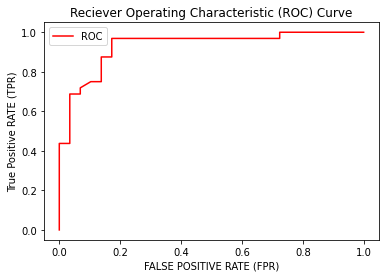

In [101]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="red", label="ROC")
    plt.xlabel("FALSE POSITIVE RATE (FPR)")
    plt.ylabel("True Positive RATE (TPR)")
    plt.title("Reciever Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

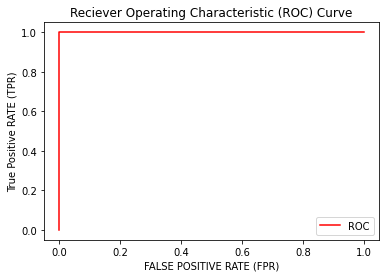

In [102]:
# The perfect ROC Curve

fpr, tpr, thresholds = roc_curve(Y_test, Y_test)
plot_roc_curve(fpr, tpr)

# CONFUSION MATRIX
### A Confustion matrix is a way of comparing the labels a model predicts and the labels the model is supposed to predict to get the idea where the model is getting confused.


In [104]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [105]:
# Visualizing the confusion matrix using the pd.crosstabs()
pd.crosstab(Y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [ ]:
!conda install seaborn

<AxesSubplot:>

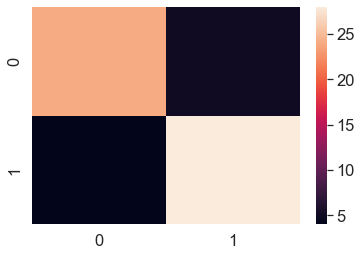

In [114]:
#Make the confusion matrix more visual using the Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot is using Seaborn
sns.heatmap(conf_mat)

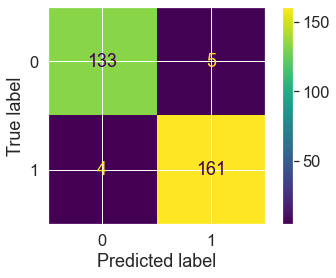

In [116]:
#Improving the display for the matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=Y)

# EVALUATION A REGRESSION MODEL

In [117]:
# Import algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Creating the data from the dataset.
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Splitting the data into the train & test samples.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Initialize and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, Y_train)

# Checking the score of the model (on the test set)
model.score(X_test, Y_test)

0.8065734772187598

# IMPROVING OUR MACHINE LEARNING MODEL

## There are three ways to improve hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [121]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [122]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}